## Machine Learning Overview!!

#### Hello, this is a machine learning overview that shows the series of steps, libraries, and methods used in a typical machine learning process

#### Please Like and suscribe 🙏

Machine learning is a branch of artificial intelligence where systems learn from data to identify patterns and make decisions without being explicitly programmed. It enables models to improve their performance over time with experience.

We will be using a maleria test result data of infected and uninfected patients and we will see some of the methods suitably used in the process. 

#### Step1: Import our libraries and read the data set

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Our malaria data set was gotten from kaggle dataset. And read.

In [6]:
csv_file_path = 'annotation.csv'
data_dir = 'All_corrected_data'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [7]:
df.head()

,image_id,grade
0,C168P129ThinF_IMG_20151118_161940_cell_79.png,0
1,C51AP12thinF_IMG_20150724_153313_cell_100.png,1
2,C238NThinF_IMG_20151207_114345_cell_115.png,0
3,C59P20thinF_IMG_20150803_113051_cell_188.png,1
4,C68P29N_ThinF_IMG_20150819_134112_cell_141.png,1


#### the data was path linked to the image_id data_dir in a function algorithm

In [26]:
# Define a function to process each row
def process_row(row):
    file_dir = os.path.join(data_dir, row['image_id'])
    label = 'Infected' if row['grade'] == 1 else 'Uninfected'
    return file_dir, label

# Apply the function to each row and store the results in two columns
df[['filepaths', 'labels']] = df.apply(process_row, axis=1, result_type='expand')


In [27]:
df.head()

,image_id,grade,filepaths,labels,year,month,day,time
0,C168P129ThinF_IMG_20151118_161940_cell_79.png,0,All_corrected_data\C168P129ThinF_IMG_20151118_...,Uninfected,2015,11,18,161940
1,C51AP12thinF_IMG_20150724_153313_cell_100.png,1,All_corrected_data\C51AP12thinF_IMG_20150724_1...,Infected,2015,07,24,153313
2,C238NThinF_IMG_20151207_114345_cell_115.png,0,All_corrected_data\C238NThinF_IMG_20151207_114...,Uninfected,2015,12,07,114345
3,C59P20thinF_IMG_20150803_113051_cell_188.png,1,All_corrected_data\C59P20thinF_IMG_20150803_11...,Infected,2015,08,03,113051
4,C68P29N_ThinF_IMG_20150819_134112_cell_141.png,1,All_corrected_data\C68P29N_ThinF_IMG_20150819_...,Infected,2015,08,19,134112


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26161 entries, 0 to 26160
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_id   26161 non-null  object
 1   grade      26161 non-null  int64 
 2   filepaths  26161 non-null  object
 3   labels     26161 non-null  object
 4   year       26161 non-null  object
 5   month      26161 non-null  object
 6   day        26161 non-null  object
 7   time       26161 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


#### null values
Checks for null values

In [29]:
df.isnull().values.any()

False

In [30]:
df.isnull().sum()

image_id     0
grade        0
filepaths    0
labels       0
year         0
month        0
day          0
time         0
dtype: int64

#### Redefine the data set for proper visualization, splitted out the year, month, day, and time from the image_id

In [31]:
# Extract year, month, and day from the image_id
df['year'] = df['image_id'].str.extract(r'IMG_(\d{4})')  # Extract the year part (YYYY)
df['month'] = df['image_id'].str.extract(r'IMG_\d{4}(\d{2})')  # Extract the month part (MM)
df['day'] = df['image_id'].str.extract(r'IMG_\d{6}(\d{2})')  # Extract the day part (DD)

# Extract the time part (HHMMSS)
df['time'] = df['image_id'].str.extract(r'IMG_\d{8}_(\d{6})')  # Extract the time (HHMMSS)

# Check the result
print(df[['image_id', 'year', 'month', 'day', 'time']].head())


                                         image_id  year month day    time
0   C168P129ThinF_IMG_20151118_161940_cell_79.png  2015    11  18  161940
1   C51AP12thinF_IMG_20150724_153313_cell_100.png  2015    07  24  153313
2     C238NThinF_IMG_20151207_114345_cell_115.png  2015    12  07  114345
3    C59P20thinF_IMG_20150803_113051_cell_188.png  2015    08  03  113051
4  C68P29N_ThinF_IMG_20150819_134112_cell_141.png  2015    08  19  134112


In [32]:
df.head()

,image_id,grade,filepaths,labels,year,month,day,time
0,C168P129ThinF_IMG_20151118_161940_cell_79.png,0,All_corrected_data\C168P129ThinF_IMG_20151118_...,Uninfected,2015,11,18,161940
1,C51AP12thinF_IMG_20150724_153313_cell_100.png,1,All_corrected_data\C51AP12thinF_IMG_20150724_1...,Infected,2015,07,24,153313
2,C238NThinF_IMG_20151207_114345_cell_115.png,0,All_corrected_data\C238NThinF_IMG_20151207_114...,Uninfected,2015,12,07,114345
3,C59P20thinF_IMG_20150803_113051_cell_188.png,1,All_corrected_data\C59P20thinF_IMG_20150803_11...,Infected,2015,08,03,113051
4,C68P29N_ThinF_IMG_20150819_134112_cell_141.png,1,All_corrected_data\C68P29N_ThinF_IMG_20150819_...,Infected,2015,08,19,134112


#### Viisualizations

Comparing the labels of uninfected and infected, and grade data by using a countplot

<AxesSubplot:xlabel='labels', ylabel='count'>

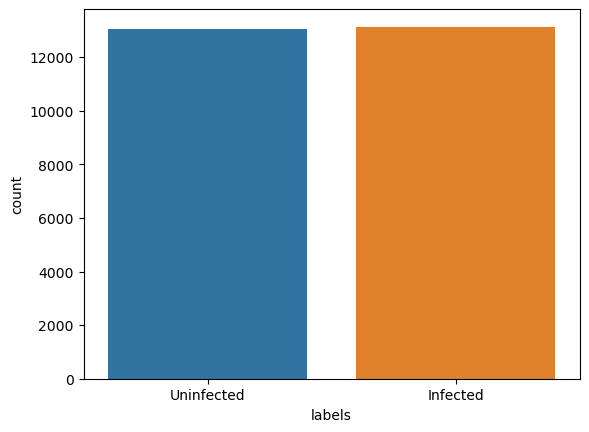

In [33]:
sns.countplot(x='labels', data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

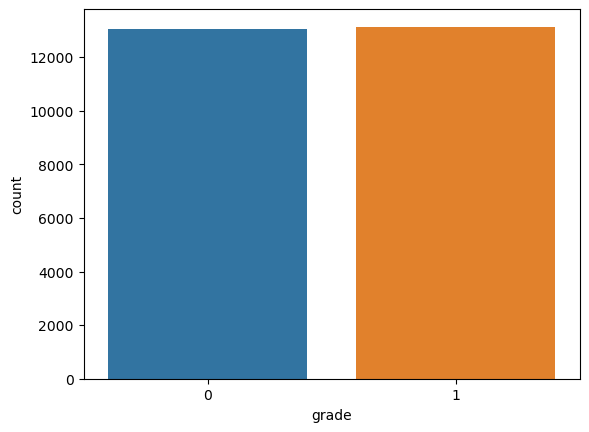

In [34]:
sns.countplot(x='grade', data=df)

In [39]:
df.groupby('labels')['grade'].value_counts()

labels      grade
Infected    1        13132
Uninfected  0        13029
Name: grade, dtype: int64

### Step2: Loading and Displaying Images

#### The code defines a function that randomly samples and displays images labeled as "Infected" and "Uninfected" from a DataFrame, showing five images of each type in a grid format using Matplotlib. 
This is achieved by creating a function algorithm display_sample_images that will show both infected and uninfected images in 2 rows

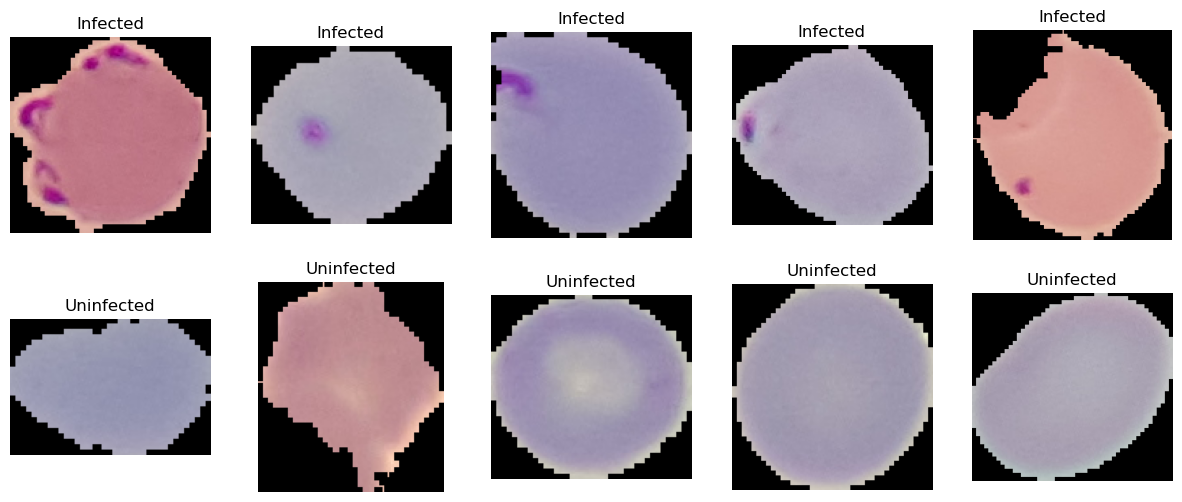

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

# Define a function to load and display images
def display_sample_images(df, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 6))
    infected = df[df['labels'] == 'Infected'].sample(num_samples)
    uninfected = df[df['labels'] == 'Uninfected'].sample(num_samples)
    
    # Display infected images
    for i, (idx, row) in enumerate(infected.iterrows()):
        img = Image.open(row['filepaths'])
        axes[0, i].imshow(img)
        axes[0, i].set_title('Infected')
        axes[0, i].axis('off')
    
    # Display uninfected images
    for i, (idx, row) in enumerate(uninfected.iterrows()):
        img = Image.open(row['filepaths'])
        axes[1, i].imshow(img)
        axes[1, i].set_title('Uninfected')
        axes[1, i].axis('off')
    
    plt.show()

# Display sample images
display_sample_images(df)


### Logistic Regression:

Logistic regression is a statistical model that is used to predict the probability of a binary outcome, such as yes or no, true or false, or success or failure. It is a type of supervised learning, which means that it is trained on a set of data that includes both the independent variables (the features that you want to use to make the prediction) and the dependent variable (the binary outcome).

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Map 'Infected' to 1 and 'Uninfected' to 0
df['label_numeric'] = df['labels'].map({'Infected': 1, 'Uninfected': 0})

# Define features (using 'grade' here as the feature) and target
X = df[['grade']]  # You can add more features here if needed
y = df['label_numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[2602    0]
 [   0 2631]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2602
           1       1.00      1.00      1.00      2631

    accuracy                           1.00      5233
   macro avg       1.00      1.00      1.00      5233
weighted avg       1.00      1.00      1.00      5233


Accuracy Score: 1.0


####  Confusion matrix was visualized with the heat map

A heatmap visualization of the confusion matrix, which summarizes the performance of the classification model by displaying the counts of true positive, true negative, false positive, and false negative predictions. The heatmap uses a blue color palette, with annotations indicating the exact counts, and includes labels for both the predicted and actual classes ("Uninfected" and "Infected").

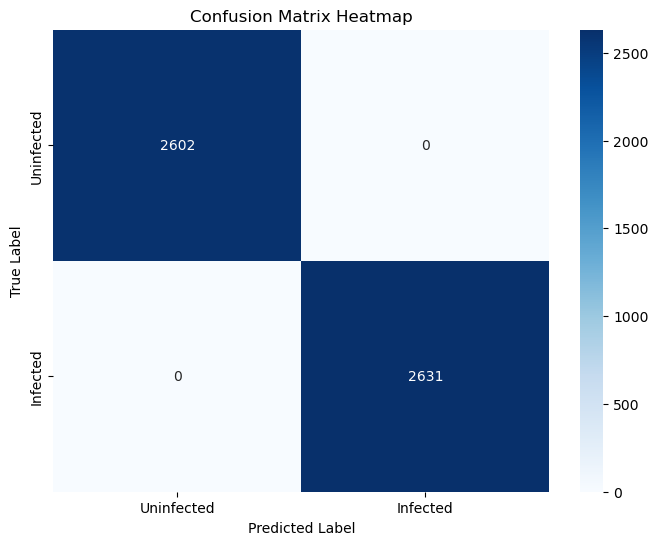

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Uninfected', 'Infected'], 
            yticklabels=['Uninfected', 'Infected'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Confusion Matrix

To be certain of our predictiions we re-coded confusion matrix to compare if the predicted values were same with the actual ones.

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Uninfected', 'Infected'])
print("\nClassification Report:\n", report)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[2602    0]
 [   0 2631]]

Classification Report:
               precision    recall  f1-score   support

  Uninfected       1.00      1.00      1.00      2602
    Infected       1.00      1.00      1.00      2631

    accuracy                           1.00      5233
   macro avg       1.00      1.00      1.00      5233
weighted avg       1.00      1.00      1.00      5233


Accuracy Score: 1.0


### Thank you. Till next time.